# Ejercicio - CNN

Tomando el dataset de dígitos del MNIST, construir una red convolucional y extraer su reporte de métricas.

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using ca


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In [4]:
inputs = keras.Input(shape=(28,28,1))#TODO
x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #TODO capa convolucional
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x) #TODO capa convolucional
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x) #TODO capa convolucional
x = layers.Flatten()(x) #TODO flatten
outputs = layers.Dense(10, activation="softmax")(x) #TODO
model = keras.Model(inputs=inputs, outputs=outputs) #TODO


In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) #TODO - Set de datos y sus medidas
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1 )) #TODO - Set de datos y sus medidas
test_images = test_images.astype("float32") / 255

model.compile(optimizer="adam", #TODO
              loss="sparse_categorical_crossentropy", #TODO
              metrics=["accuracy"])

H = model.fit(train_images, #TODO
              train_labels, #TODO
              epochs=5,
              batch_size=64,
              validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 70s 80ms/step - loss: 0.2180 - accuracy: 0.9353 - val_loss: 0.0669 - val_accuracy: 0.9800
Epoch 2/5
750/750 [==============================] - 56s 74ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 3/5
750/750 [==============================] - 54s 72ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0478 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 54s 72ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0447 - val_accuracy: 0.9864
Epoch 5/5
750/750 [==============================] - 56s 75ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0337 - val_accuracy: 0.9904


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 10s 11ms/step - loss: 0.0296 - accuracy: 0.9911
Test accuracy: 0.991


[INFO]: Evaluando red neuronal...
313/313 [==============================] - 10s 11ms/step - loss: 0.0296 - accuracy: 0.9911
Loss 0.029555004090070724, accuracy 0.991100013256073


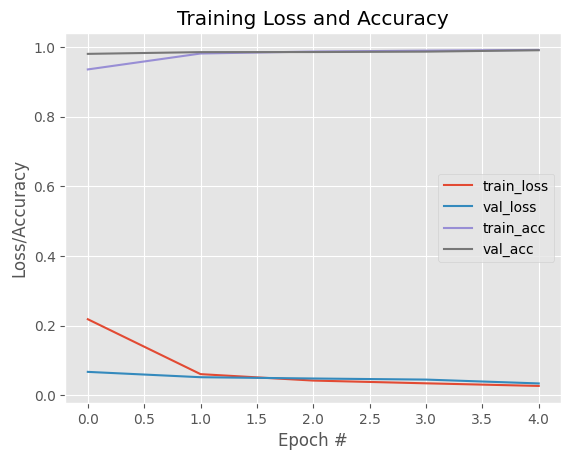

In [7]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(test_images)#TODO
loss, accuracy = model.evaluate(test_images, test_labels)#TODO
print('Loss {}, accuracy {}'.format(loss,accuracy))

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()